In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter  


### Plot the level of error signal in dBm0. (RANDOM)

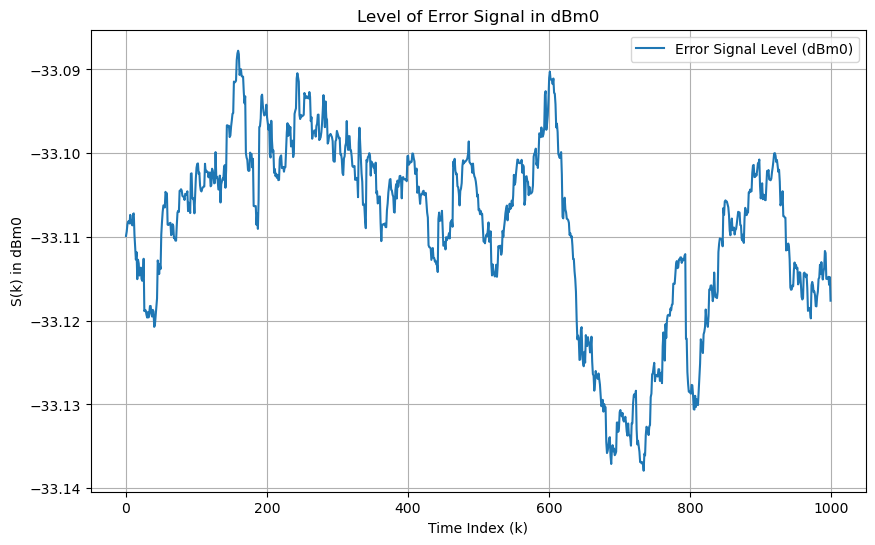

In [3]:
# Parameters (You may need to replace these with your actual data)
n = 5600  # or a multiple of 5600
k_values = np.arange(0, 1000)  # Time indices for which we want to calculate S(k)
error_signal = np.random.randn(len(k_values) + n - 1)  # Simulated error signal e_i

# Calculate S(k) for each k
S_k = []
for k in k_values:
    error_squared_sum = np.sum(error_signal[k:k+n]**2)
    S_k_value = 3.17 + 20 * np.log10(np.sqrt((2 / n) * (error_squared_sum / 8159)))
    S_k.append(S_k_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, S_k, label="Error Signal Level (dBm0)")
plt.xlabel("Time Index (k)")
plt.ylabel("S(k) in dBm0")
plt.title("Level of Error Signal in dBm0")
plt.legend()
plt.grid(True)
plt.show()

In [25]:

from scipy.signal import firwin, lfilter

# Parameters
ntaps = 24
nsamp = 1000
ibeta = 8  # Equivalent to 2^8 in comments
amp = 1

# Generate reference signal (refsig)
refsig = amp * np.random.rand(nsamp) - (amp / 2)

# Generate input signal x(t)
Wn = 0.47
B = firwin(31, Wn)  # FIR filter coefficients
x = lfilter(B, 1, refsig)  # Apply FIR filter to refsig
# No need to reshape x to column vector

# Generate desired signal d(t)
Coeff = firwin(ntaps, 0.5)  # FIR filter coefficients for desired signal
d = lfilter(Coeff, 1, x)    # Apply FIR filter to x to get d

# Initialize arrays
y = np.zeros(nsamp)
e = np.zeros(nsamp)
h = np.zeros(ntaps)

# Loop to update y, e, h
for n in range(nsamp):
    if n < ntaps:
        x1 = np.concatenate((x[n::-1], np.zeros(ntaps - (n + 1))))  # Padding with zeros
    else:
        x1 = x[n:n - ntaps:-1]  # Extract ntaps elements in reverse order

    # Update y, e, h as per the algorithm
    y[n] = np.dot(h, x1)  # Dot product to simulate y(n) = h * x1'
    e[n] = d[n] - y[n]    # Calculate error e(n)
    hh = e[n] * x1 / ibeta  # Update term hh
    h += hh                # Update filter coefficients h

array([-1.84335308e-02, -1.02857903e-04,  1.91446160e-02,  2.29033590e-03,
       -2.96286813e-02, -1.02920288e-02,  4.42585724e-02,  2.41319443e-02,
       -7.54224109e-02, -6.76101467e-02,  1.66436373e-01,  4.32134446e-01,
        4.30527133e-01,  1.65064228e-01, -6.52510103e-02, -7.28422590e-02,
        2.30708089e-02,  4.27186518e-02, -8.38780191e-03, -2.73071111e-02,
        7.33144197e-04,  1.62950233e-02,  5.95612150e-04, -1.59586844e-02])

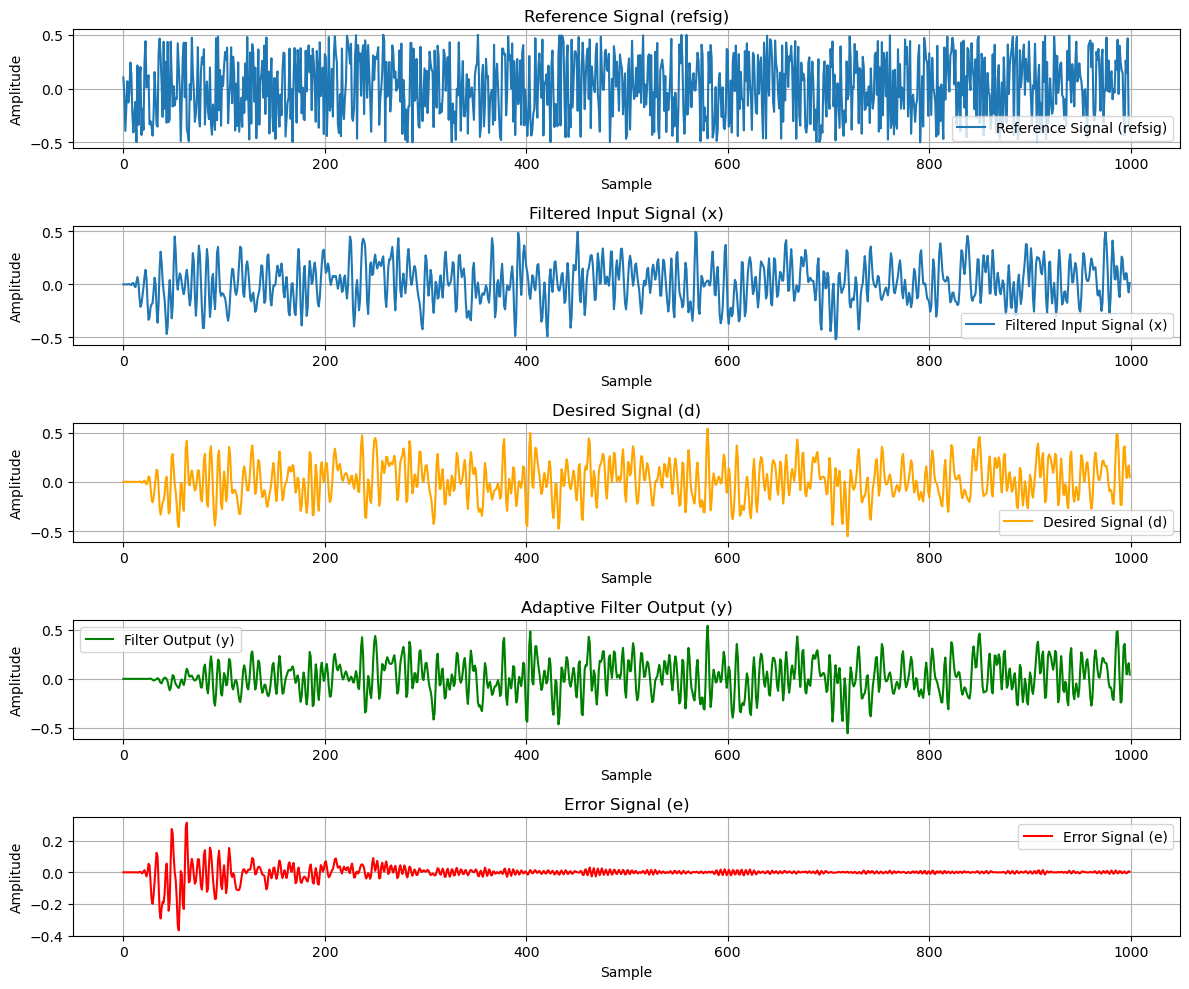

In [23]:

def plot_signals(refsig, x, d, y, e):
    plt.figure(figsize=(12, 10))

    # Plot the original reference signal
    plt.subplot(5, 1, 1)
    plt.plot(refsig, label="Reference Signal (refsig)")
    plt.title("Reference Signal (refsig)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

    # Plot the input signal after filtering (x)
    plt.subplot(5, 1, 2)
    plt.plot(x, label="Filtered Input Signal (x)")
    plt.title("Filtered Input Signal (x)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

    # Plot the desired signal (d)
    plt.subplot(5, 1, 3)
    plt.plot(d, label="Desired Signal (d)", color="orange")
    plt.title("Desired Signal (d)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

    # Plot the adaptive filter output (y)
    plt.subplot(5, 1, 4)
    plt.plot(y, label="Filter Output (y)", color="green")
    plt.title("Adaptive Filter Output (y)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

    # Plot the error signal (e)
    plt.subplot(5, 1, 5)
    plt.plot(e, label="Error Signal (e)", color="red")
    plt.title("Error Signal (e)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function with the generated data
plot_signals(refsig, x, d, y, e)

### Problem #1

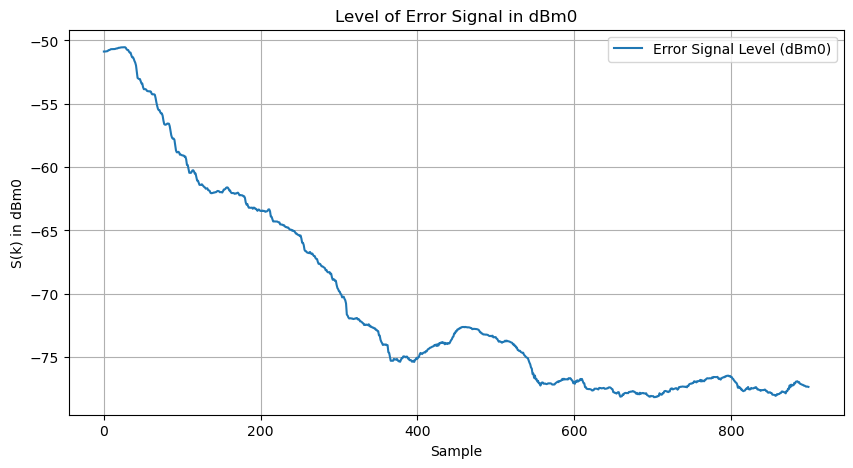

In [33]:
def calculate_error_level_dBm0(e, n):
    S_k = []
    for k in range(n, len(e)):
        error_squared_sum = np.sum(e[k - n:k] ** 2)
        S_k_value = 3.17 + 20 * np.log10(np.sqrt((2 / n) * (error_squared_sum / 8159)))
        S_k.append(S_k_value)
    return S_k

def plot_error_level_dBm0(e, n):
    # Calculate S(k) for error signal
    S_k = calculate_error_level_dBm0(e, n)
    
    # Plot the error level in dBm0
    plt.figure(figsize=(10, 5))
    plt.plot(S_k, label="Error Signal Level (dBm0)")
    plt.xlabel("Sample")
    plt.ylabel("S(k) in dBm0")
    plt.title("Level of Error Signal in dBm0")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
n = 100  # Window size for RMS calculation; adjust based on your needs
plot_error_level_dBm0(e, n)
